## K-Means Clustering

### Unsupervised Learning method to cluster data
- Takes K Number of clusters and the data as input
- Selects random K datapoints as centroids (may or may not be from the dataset)
- Calculate the distance of each point from the centroids (euclidean, manhattan etc)
- Assign the point to the nearest centroid for each training cycle
- Repeat till the clusters do not differ in subsequent cycles

### Problems
- Random Initialization Trap
 - Model susceptible to choose the correct centroid due to the wrong initialization of the random centroids.
 - Can be solved through the technique of KMeans++

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
le=LabelEncoder()
sca=StandardScaler()

In [6]:
data['Genre']=le.fit_transform(data['Genre'])

In [21]:
X=data.iloc[:,3:]

In [22]:
X=sca.fit_transform(X)

### Choosing the correct number of clusters

- To choose the correct number of clusters, we need to calculate the WCSS (Squares distance)
- Also known as the elbow method, the mean distance between the data points and the centroids decreases as the number of clusters increases as each point progressively nearers the actual data points.
- Watch for the kink in the graph resembling a human elbow, which gives the required number of clusters

In [33]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

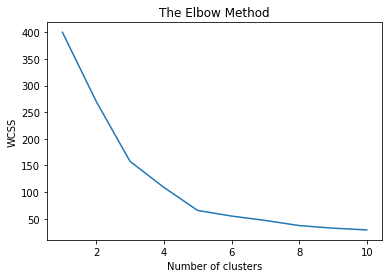

In [34]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
km=KMeans(n_clusters=5,random_state=42)
y_kmeans = km.fit_predict(X)

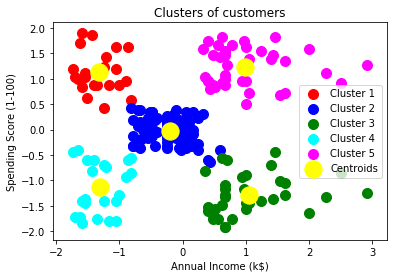

In [37]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()